In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils import np_utils

Using TensorFlow backend.
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/inderpreet/.local/lib/python3.6/site-packages/t

In [3]:

x = data.values
X = x[:,1:]
y = x[:,0]
X = X/255.0

y = np_utils.to_categorical(y)
print (X.shape, y.shape)

NameError: name 'data' is not defined

In [4]:
X_train = X[:8000,:]
y_train = y[:8000,:]

X_val = X[8000:,:]
y_val = y[8000:,:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

NameError: name 'X' is not defined

## Sequential Model

In [1]:
model = Sequential()

model.add(Dense(256, activation='tan', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

NameError: name 'Sequential' is not defined

In [35]:
adam = Adam(decay=0.0001)

In [36]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=200, shuffle=True, 
                    validation_data=(X_val,y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 143us/step - loss: 0.9740 - acc: 0.6776 - val_loss: 0.6093 - val_acc: 0.7900
Epoch 2/10
8000/8000 [==============================] - 1s 65us/step - loss: 0.5605 - acc: 0.8095 - val_loss: 0.4854 - val_acc: 0.8260
Epoch 3/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.4918 - acc: 0.8287 - val_loss: 0.5193 - val_acc: 0.8100
Epoch 4/10
8000/8000 [==============================] - 0s 62us/step - loss: 0.4627 - acc: 0.8359 - val_loss: 0.4918 - val_acc: 0.8325
Epoch 5/10
8000/8000 [==============================] - 0s 61us/step - loss: 0.4353 - acc: 0.8470 - val_loss: 0.4170 - val_acc: 0.8505
Epoch 6/10
8000/8000 [==============================] - 1s 63us/step - loss: 0.3917 - acc: 0.8622 - val_loss: 0.4047 - val_acc: 0.8540
Epoch 7/10
8000/8000 [==============================] - 1s 64us/step - loss: 0.3788 - acc: 0.8638 - val_loss: 0.4038 - val_acc: 0.8570
Epoch 

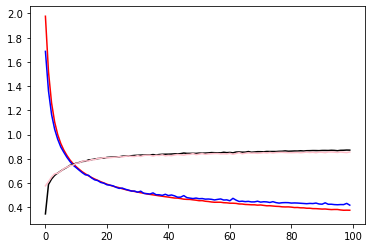

In [25]:
# SGD

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

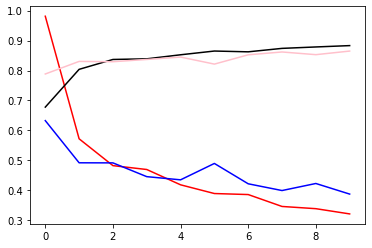

In [29]:
# Adam without decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

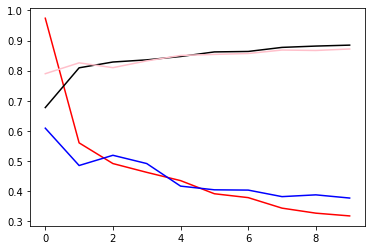

In [38]:
# Adam with decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

## Functional Model

In [41]:
inp = Input(shape=(784,))
d1 = Dense(256, activation='relu')(inp)
d2 = Dense(64, activation='relu')(d1)
d3 = Dense(10, activation='softmax')(d2)

model = Model(inputs=[inp], outputs=[d3])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [42]:
adam = Adam(decay=0.0001)

In [43]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [44]:
history = model.fit(X, y, epochs=10, 
                    batch_size=200, shuffle=True, 
                    validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 123us/step - loss: 1.0240 - acc: 0.6579 - val_loss: 0.6697 - val_acc: 0.7675
Epoch 2/10
8000/8000 [==============================] - 1s 63us/step - loss: 0.5835 - acc: 0.7991 - val_loss: 0.5752 - val_acc: 0.7955
Epoch 3/10
8000/8000 [==============================] - 0s 61us/step - loss: 0.4990 - acc: 0.8283 - val_loss: 0.4817 - val_acc: 0.8385
Epoch 4/10
8000/8000 [==============================] - 1s 72us/step - loss: 0.4544 - acc: 0.8394 - val_loss: 0.4351 - val_acc: 0.8505
Epoch 5/10
8000/8000 [==============================] - 1s 74us/step - loss: 0.4095 - acc: 0.8564 - val_loss: 0.4272 - val_acc: 0.8485
Epoch 6/10
8000/8000 [==============================] - 1s 71us/step - loss: 0.3932 - acc: 0.8634 - val_loss: 0.4179 - val_acc: 0.8570
Epoch 7/10
8000/8000 [==============================] - 1s 77us/step - loss: 0.3727 - acc: 0.8675 - val_loss: 0.4113 - val_acc: 0.8595
Epoch 

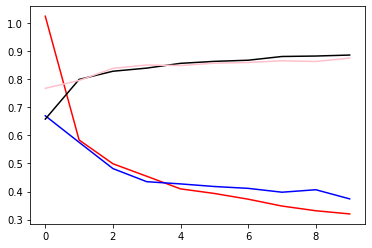

In [45]:
# Adam with decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()